In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [ ]:
df=df[['Age','EstimatedSalary','Purchased']]

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.drop(['Purchased'],axis=1),df['Purchased'],test_size=0.33)


In [ ]:

# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:2],df['Purchased'],test_size=0.33)


In [ ]:

from sklearn.preprocessing import StandardScaler
se=StandardScaler()


## *We will learn scaling on X_train and apply on X-train,X_test* ##

In [ ]:
se.fit(X_train)


StandardScaler()

In [ ]:
#Mean of both the columns get stored in se which is further applied
se.mean_

array([3.81343284e+01, 7.16268657e+04])

## *Now we will scale x-train and  x-test* ##

In [ ]:
X_train_scaled=se.transform(X_train)

X_test_scaled=se.transform(X_test)

In [ ]:
se.mean_

array([3.81343284e+01, 7.16268657e+04])

## *When we give dataframe for transformation it gets converted into numpy array so we need to convert it to dataframe* ##

In [ ]:
X_train

,Age,EstimatedSalary
261,36,144000
370,60,46000
382,44,139000
67,23,82000
159,32,135000
...,...,...
62,23,66000
255,52,90000
13,32,18000
16,47,25000


In [ ]:
X_train_scaled

In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [ ]:
X_train_scaled

,Age,EstimatedSalary
0,-0.205635,2.068558
1,2.106678,-0.732463
2,0.565136,1.925649
3,-1.458137,0.296483
4,-0.591020,1.811321
...,...,...
263,-1.458137,-0.160826
264,1.335907,0.525138
265,-0.591020,-1.532755
266,0.854175,-1.332682


In [ ]:
np.round(X_train.describe(),1)

NameError: ignored

In [ ]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,268.0,268.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,0.0
max,2.0,2.0


Text(0.5, 1.0, 'After Scaling')

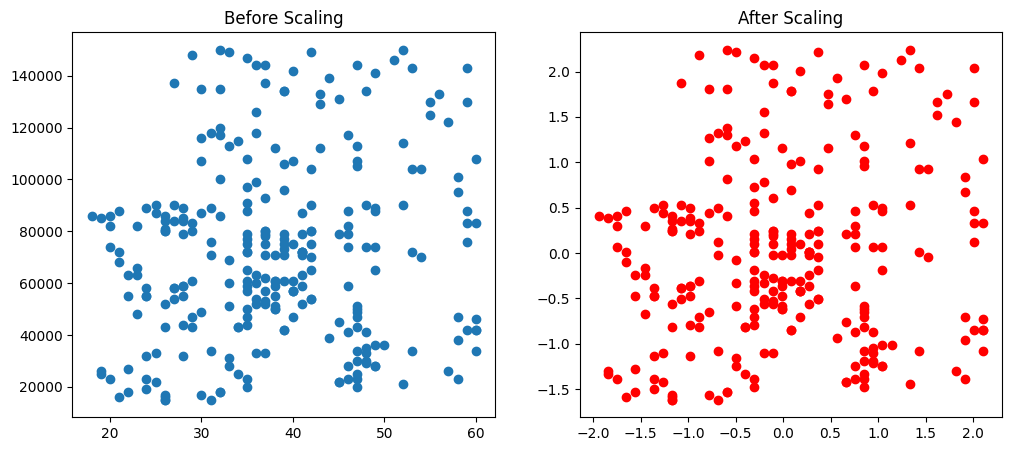

In [ ]:
import matplotlib.pyplot as plt


fig ,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Estimated Salary'>

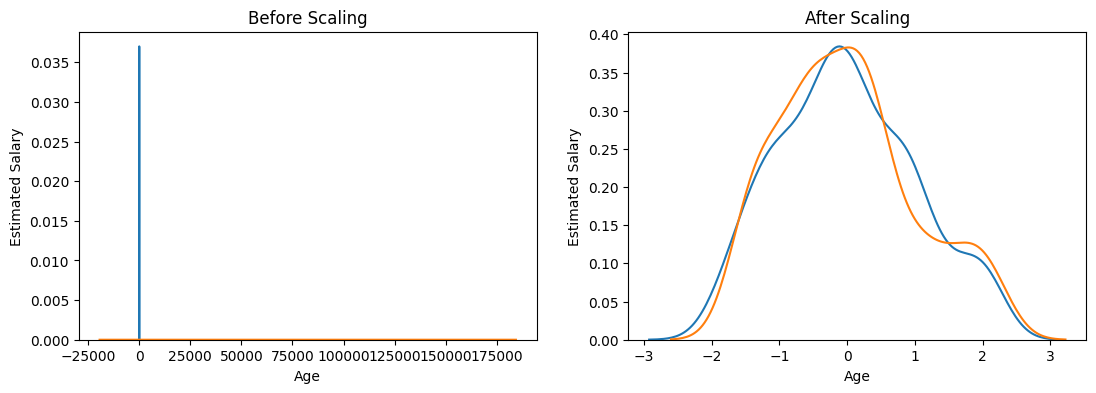

In [ ]:
import seaborn as sns


fig ,(ax1,ax2)=plt.subplots(ncols=2,figsize=(13,4))
ax1.set_title("Before Scaling")
ax1.set_xlabel("Age")
ax1.set_ylabel("Estimated Salary")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("After Scaling")
ax2.set_xlabel("Age")
ax2.set_ylabel("Estimated Salary")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)


## *Individual Distribution of Age after Scaling* ##

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

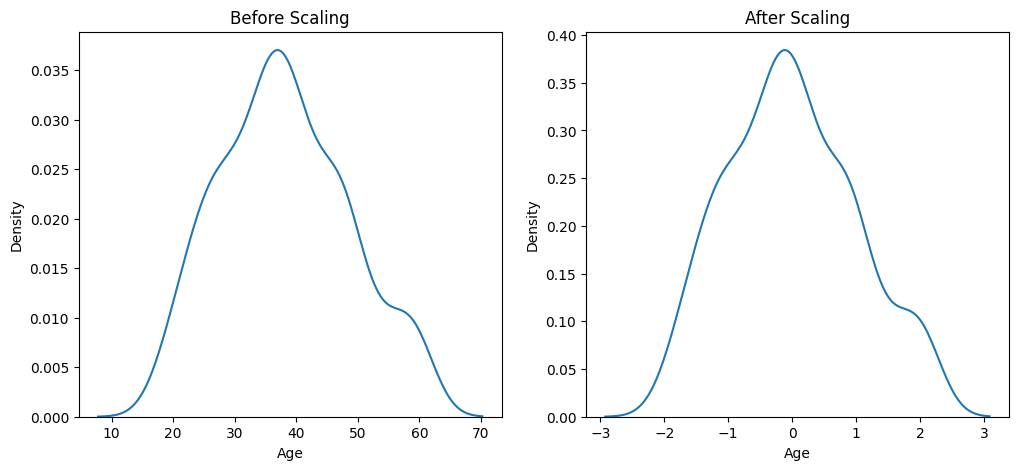

In [ ]:
figure, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)


#After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

## *Individual Distribution of EstimatedSalary after Scaling* ##

<Axes: title={'center': 'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

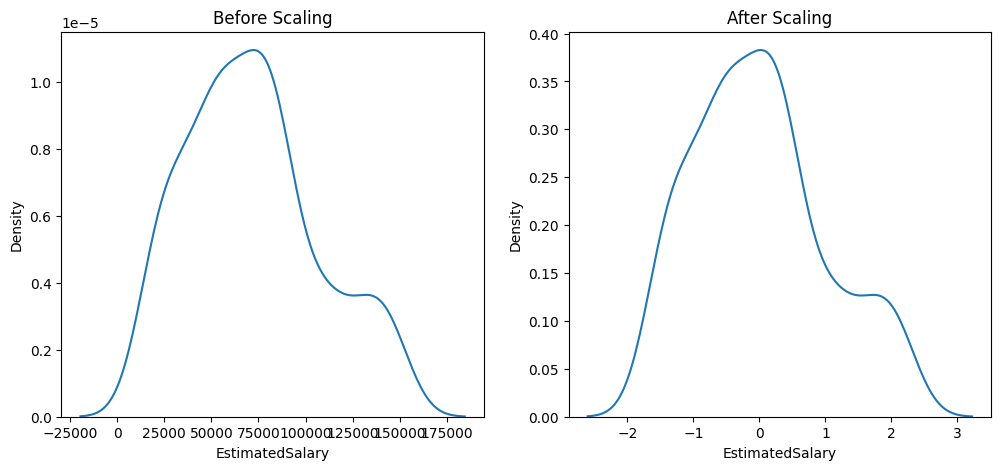

In [ ]:
figure, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)


#After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

## *Why Scaling is important* ##

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_scaled=LogisticRegression()

lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7121212121212122


In [ ]:
print(accuracy_score(y_test,y_pred_scaled))


0.8787878787878788


In [ ]:
from sklearn.tree import DecisionTreeClassifier

De=DecisionTreeClassifier()

De_scaled=DecisionTreeClassifier()

In [ ]:
De.fit(X_train,y_train)

De_scaled.fit(X_train_scaled,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred=De.predict(X_test)

y_pred_scaled=De_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:

print("Before Scaling :",accuracy_score(y_test,y_pred))
print("After Scaling :",accuracy_score(y_test,y_pred_scaled))

Before Scaling : 0.9015151515151515
After Scaling : 0.8939393939393939
